In [2]:
import pandas as pd
url = 'http://www.kbreport.com' #다른 이름으로 저장
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [3]:
baseball = tables[0]

In [4]:
#base = baseball.set_index('팀명',inplace=True)#return 없이 자체적으로 바꾸기, 2번 실행하면 에러
base = baseball.set_index('팀명')

In [5]:
data = base.drop(columns='연속')
data.shape

(10, 8)

In [19]:
#2차원으로 변환한 후 k개로 클러스터링
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import mglearn
pca = PCA(n_components=2).fit(data)
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [7]:
#k means 로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
group = km.predict(data_pca)

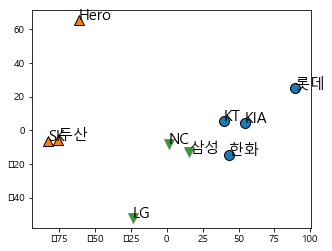

In [17]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5,4))
plt.xlim(data_pca[:,0].min(),data_pca[:,0].max()+1)
plt.ylim(data_pca[:,1].min(),data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i], fontdict={'size':15})
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)

In [23]:
wine = pd.read_csv('wine.data', header=None)
wine.shape

(178, 14)

In [35]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
x = wine.iloc[:, 1:]
pca = PCA(n_components=2).fit(x)
wine_pca = pca.transform(x)# 주성분 2개 추출
km = KMeans(n_clusters=3).fit(wine_pca)# 3개로 그룹화
group = km.predict(wine_pca)

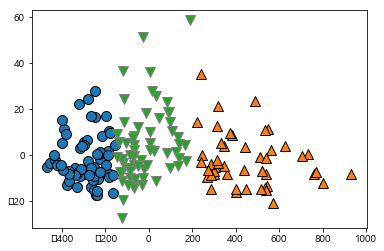

In [40]:
l = mglearn.discrete_scatter(wine_pca[:,0], wine_pca[:,1], group)

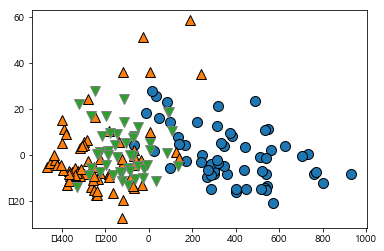

In [36]:
l = mglearn.discrete_scatter(wine_pca[:,0], wine_pca[:,1], wine.iloc[:, 0])

#### 대출 상환 여부 
1. get_dummy() 로 purpose 원핫 인코딩
1. PCA 로 2차원으로 축소
1. K-Mneas (2개) 로 그룹화
1. 산점도로 출력

In [ ]:
loans = pd.read_csv('loans.csv')
loans = loans.dropna()
loans_hot = pd.get_dummies(loans)

In [56]:
x_pca = PCA(n_components=2).fit(loans_hot).transform(loans_hot) #차원 축소
km = KMeans(n_clusters=2).fit(x_pca)# 2개로 그룹화
group = km.predict(x_pca) 

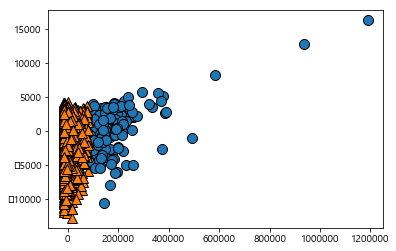

In [57]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], group) #예측

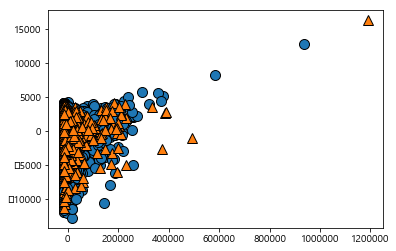

In [55]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], loans.iloc[:,-1])  #실제로 돈 안값는 사람 